In [40]:
import os.path
import matplotlib.pyplot as plt
import numpy as np
from rlutils.utils import *
from rlutils.vision import *
import pickle
import traceback
from rlutils.plot_utils import config_paper
cos=config_paper()
offsetDetection=100


img = cv2.imread('/home/sardor/1-THESE/2-Robotic_Fish/2-DDPG/deepFish/servo-experiment/results/newCamera-fs/1/40_2.0_markedbug-46.jpg')
def red_point_debug(img, offsetDetection=100):
    '''
    return the center of the red point
    '''
    try:
        assert len(img.shape)==3, 'image must have 3 channels'
        # Convert the image from BGR to HSV
        hsv = cv2.cvtColor(img[offsetDetection:-offsetDetection,:], cv2.COLOR_BGR2HSV)

        # Define a range of red color in HSV
        lower_red = np.array([0, 50, 50])
        upper_red = np.array([10, 255, 255])
        mask1 = cv2.inRange(hsv, lower_red, upper_red)

        lower_red = np.array([170, 50, 50])
        upper_red = np.array([180, 255, 255])
        mask2 = cv2.inRange(hsv, lower_red, upper_red)

        # Combine the two masks
        mask = mask1 + mask2
        #dilate and erode the mask
        mask = cv2.dilate(mask, kernel, iterations=2)
        mask = cv2.erode(mask, kernel, iterations=2)
    
        cx, cy = detect_point_from_mask(mask)
        return cx, cy+offsetDetection, mask
    except Exception as e:
        print(e)
        traceback.print_exc()
        print('error with red point')
        raise IOError
cx, cy, mask = red_point_debug(img, offsetDetection=offsetDetection)
print(cx, cy)

110 237


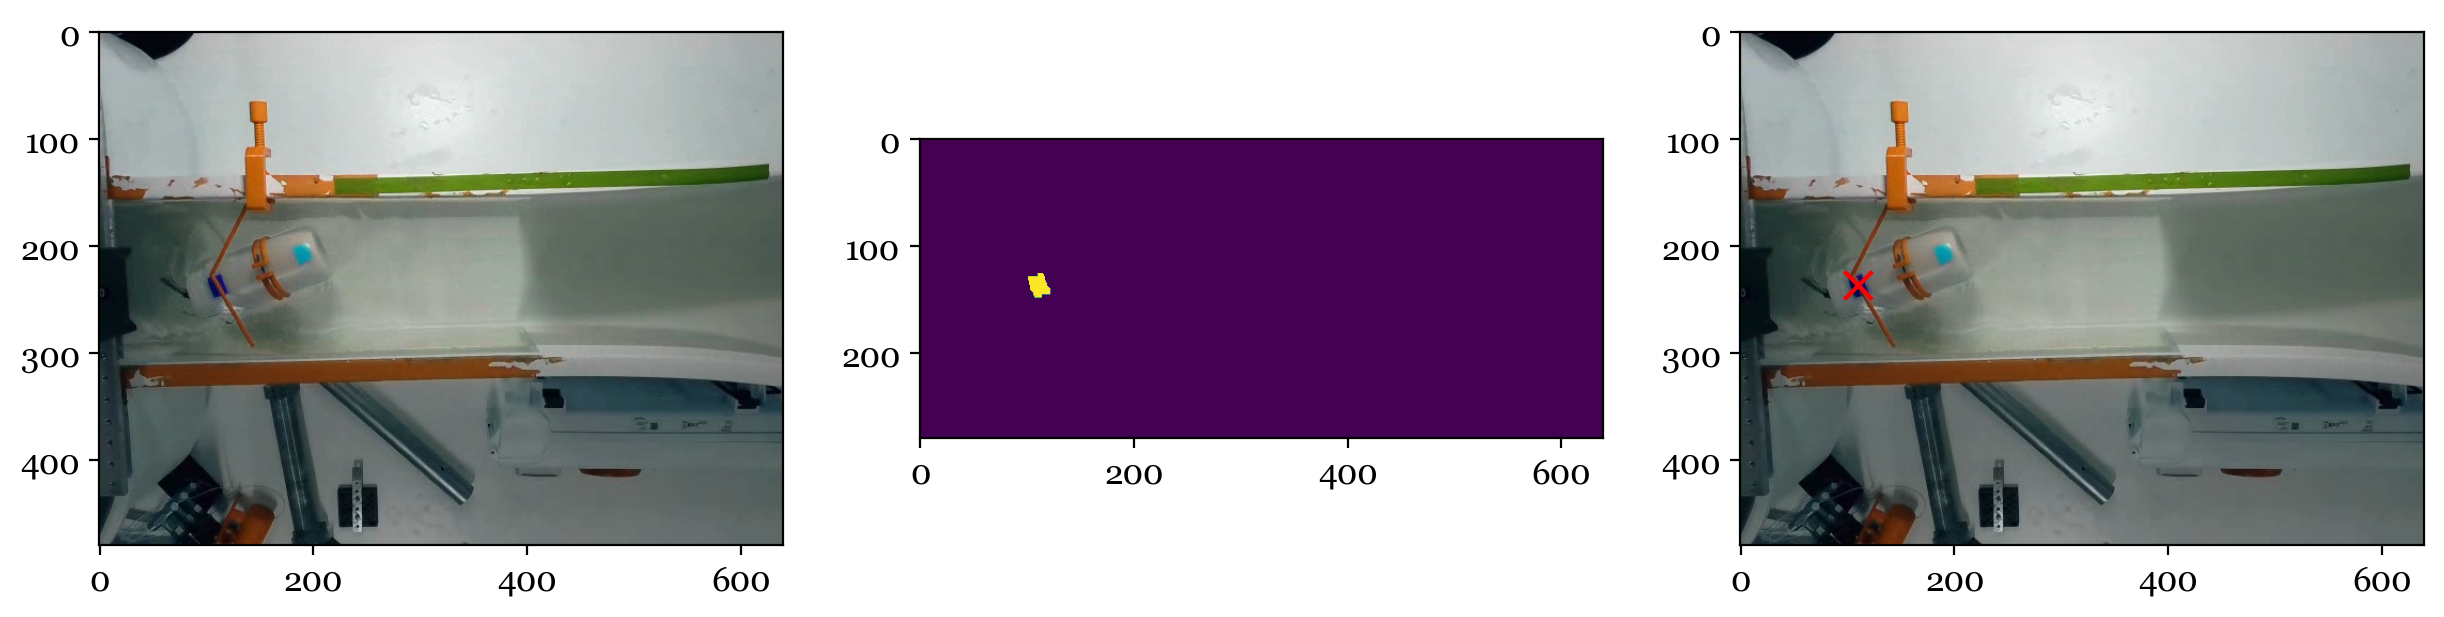

In [41]:
def plot_img_mask(img, mask, cx, cy, offsetDetection=100):
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].imshow(img,)
    ax[1].imshow(mask)
    ax[2].imshow(img)
    ax[2].scatter(cx, cy, s=100, c='r', marker='x')
    plt.show()
#show the image, mask and the detected red point
plot_img_mask(img, mask, cx, cy, offsetDetection=offsetDetection)

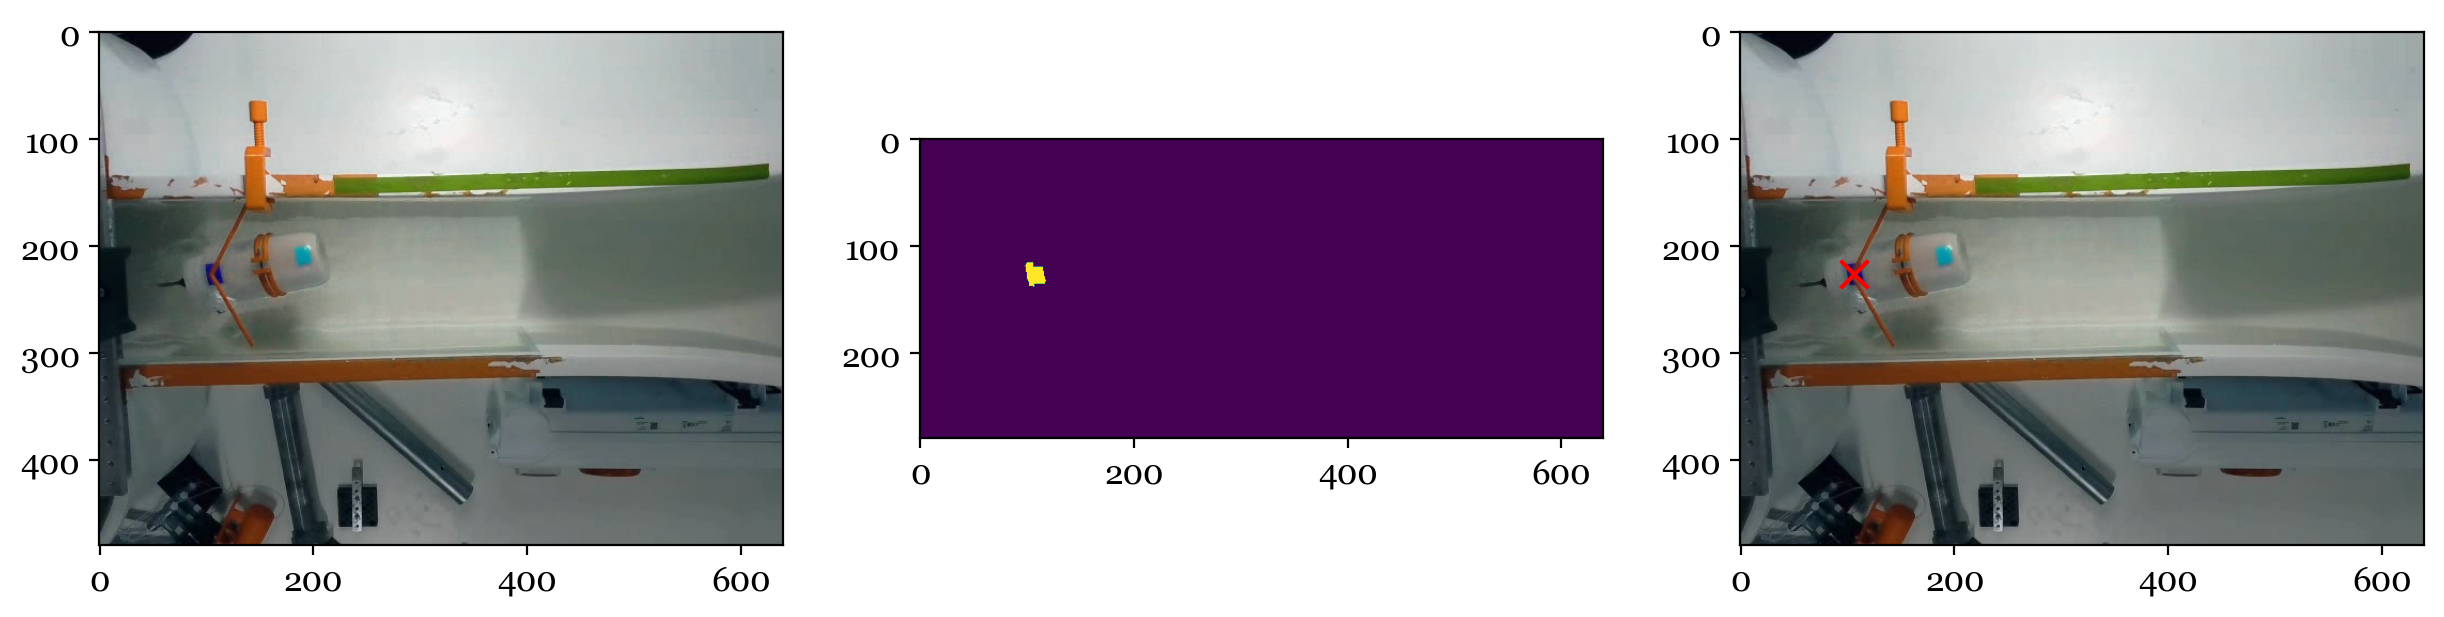

40_7.5_markedbug-65.jpg


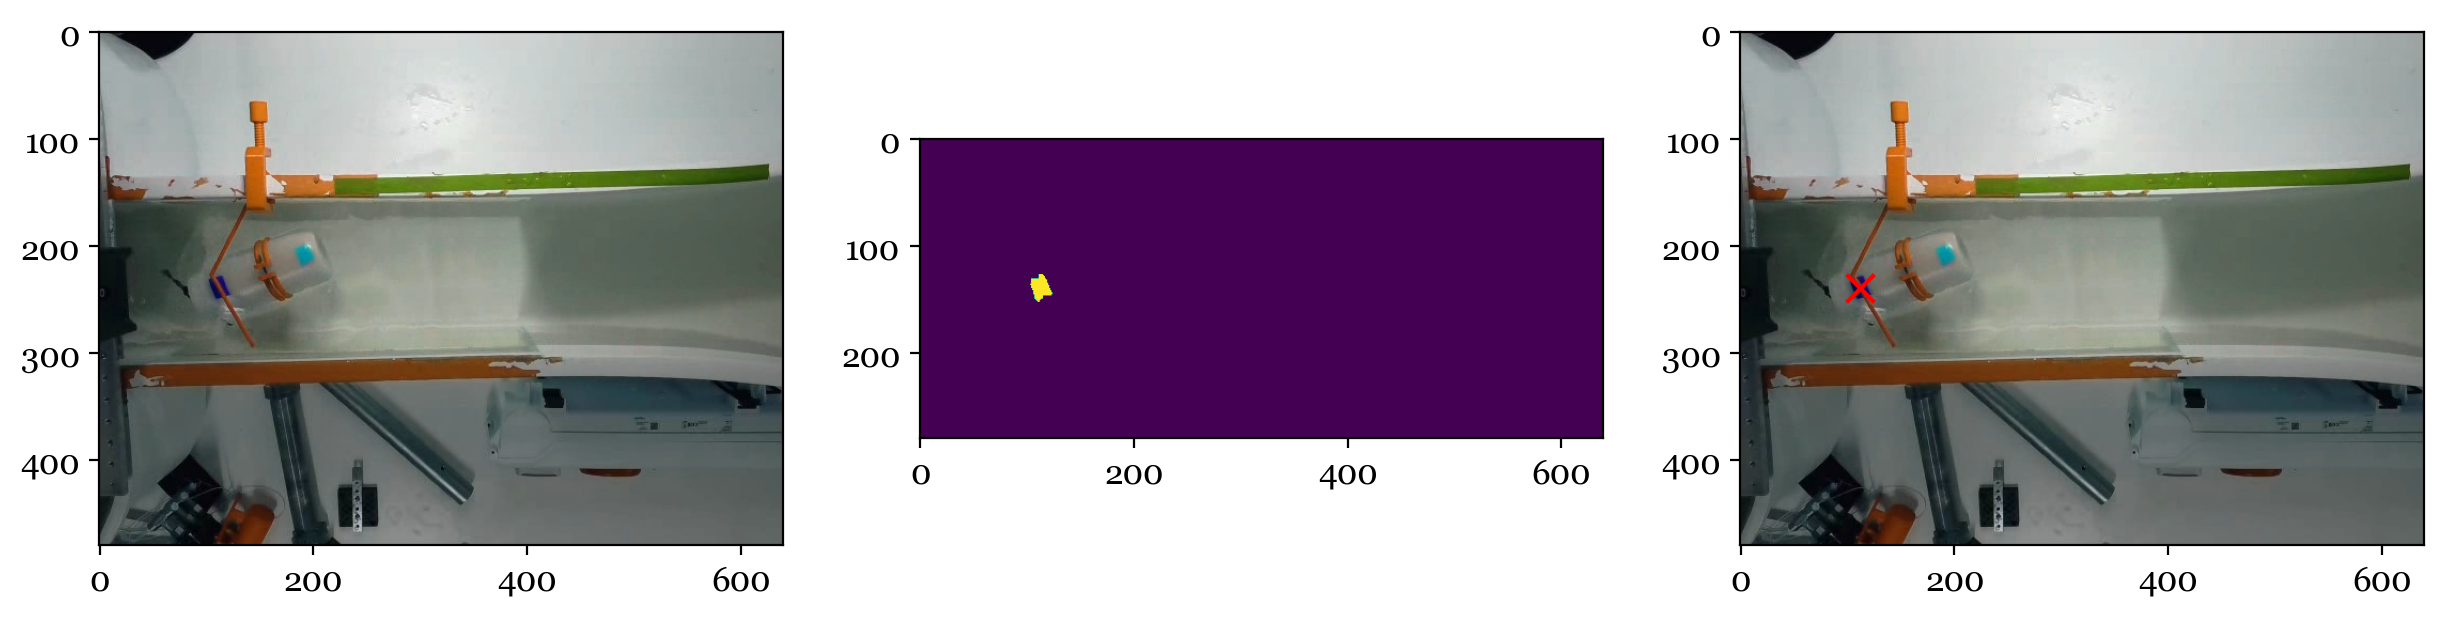

40_1.5_markedbug-55.jpg


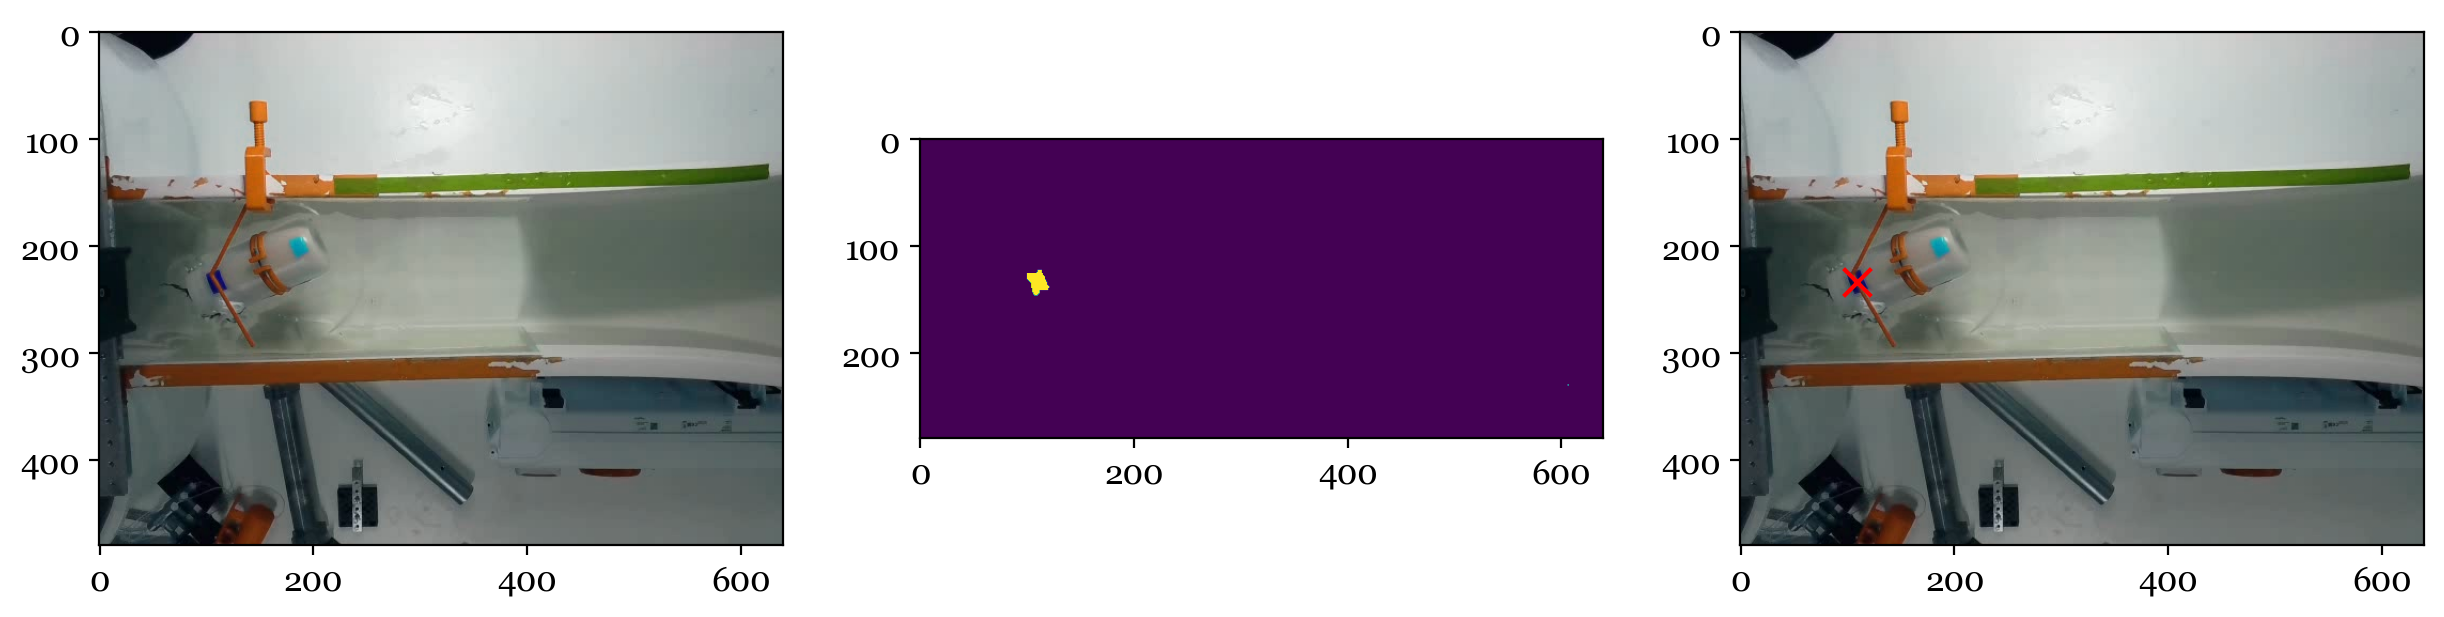

40_3.5_markedbug-36.jpg


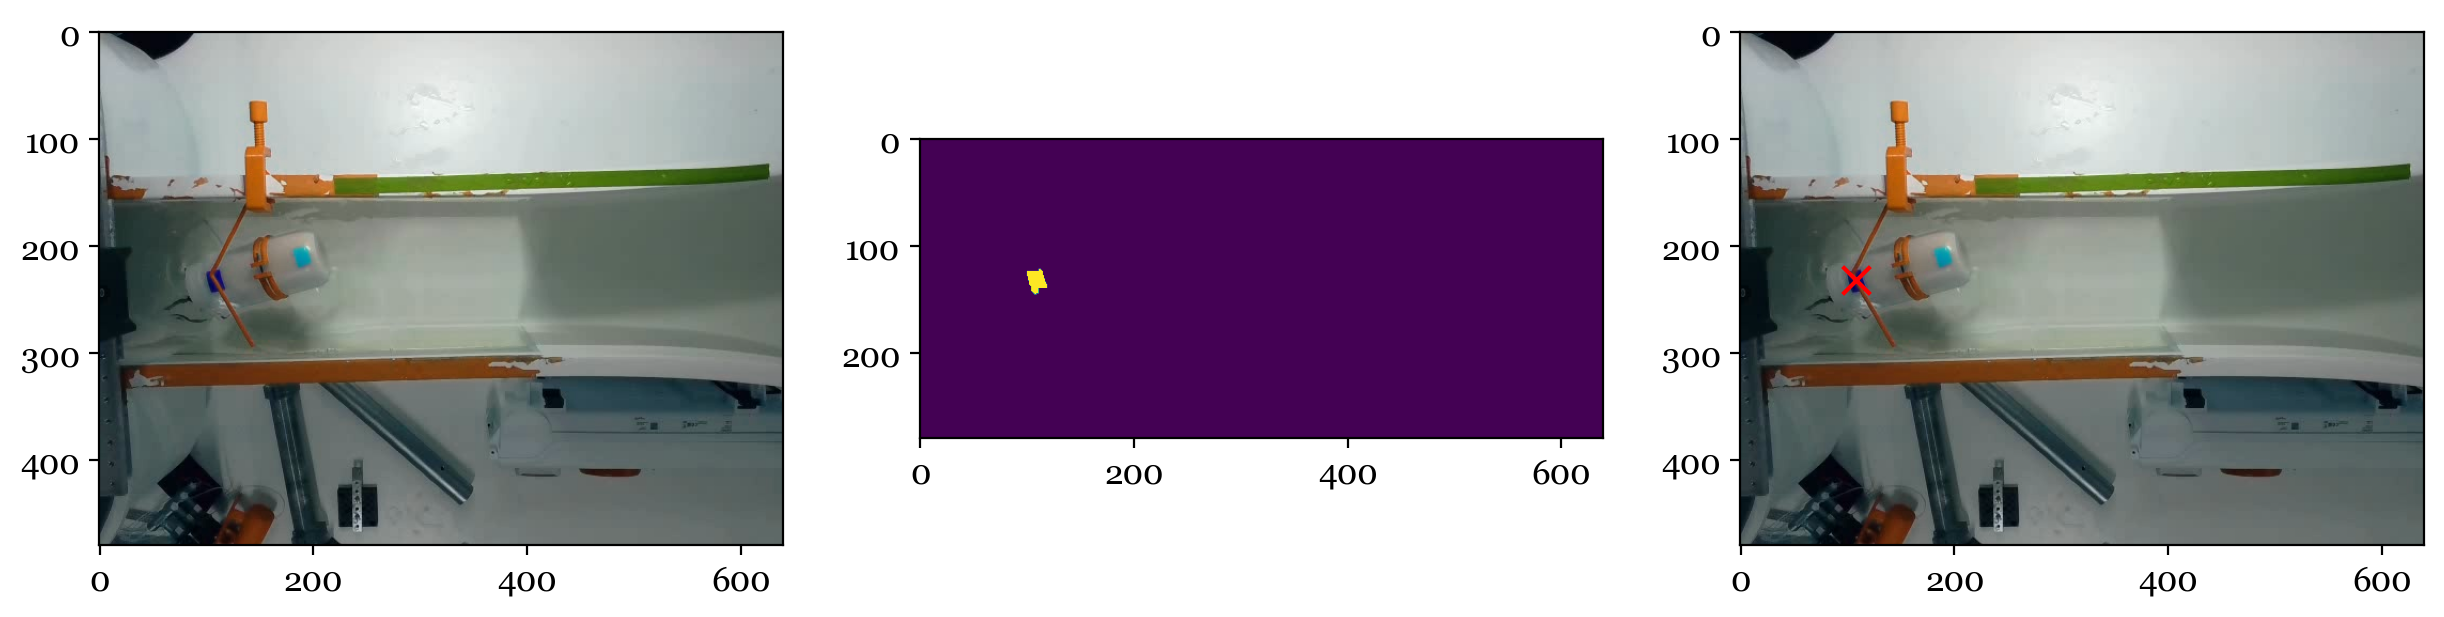

40_3.0_markedbug-36.jpg


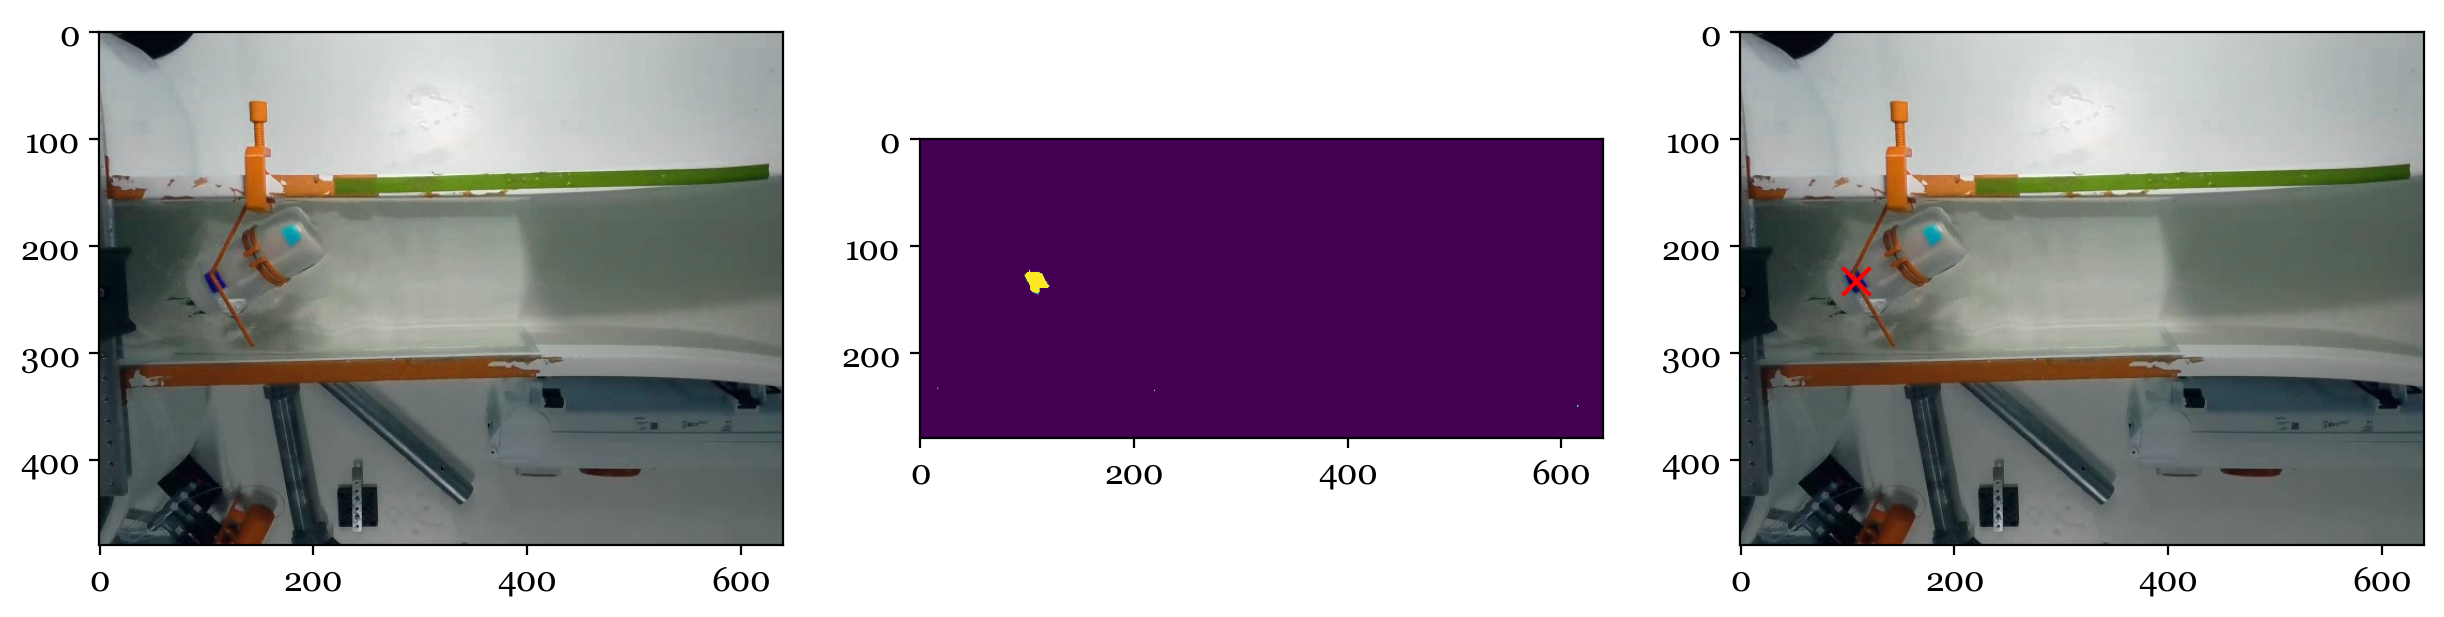

40_4.5_markedbug-38.jpg


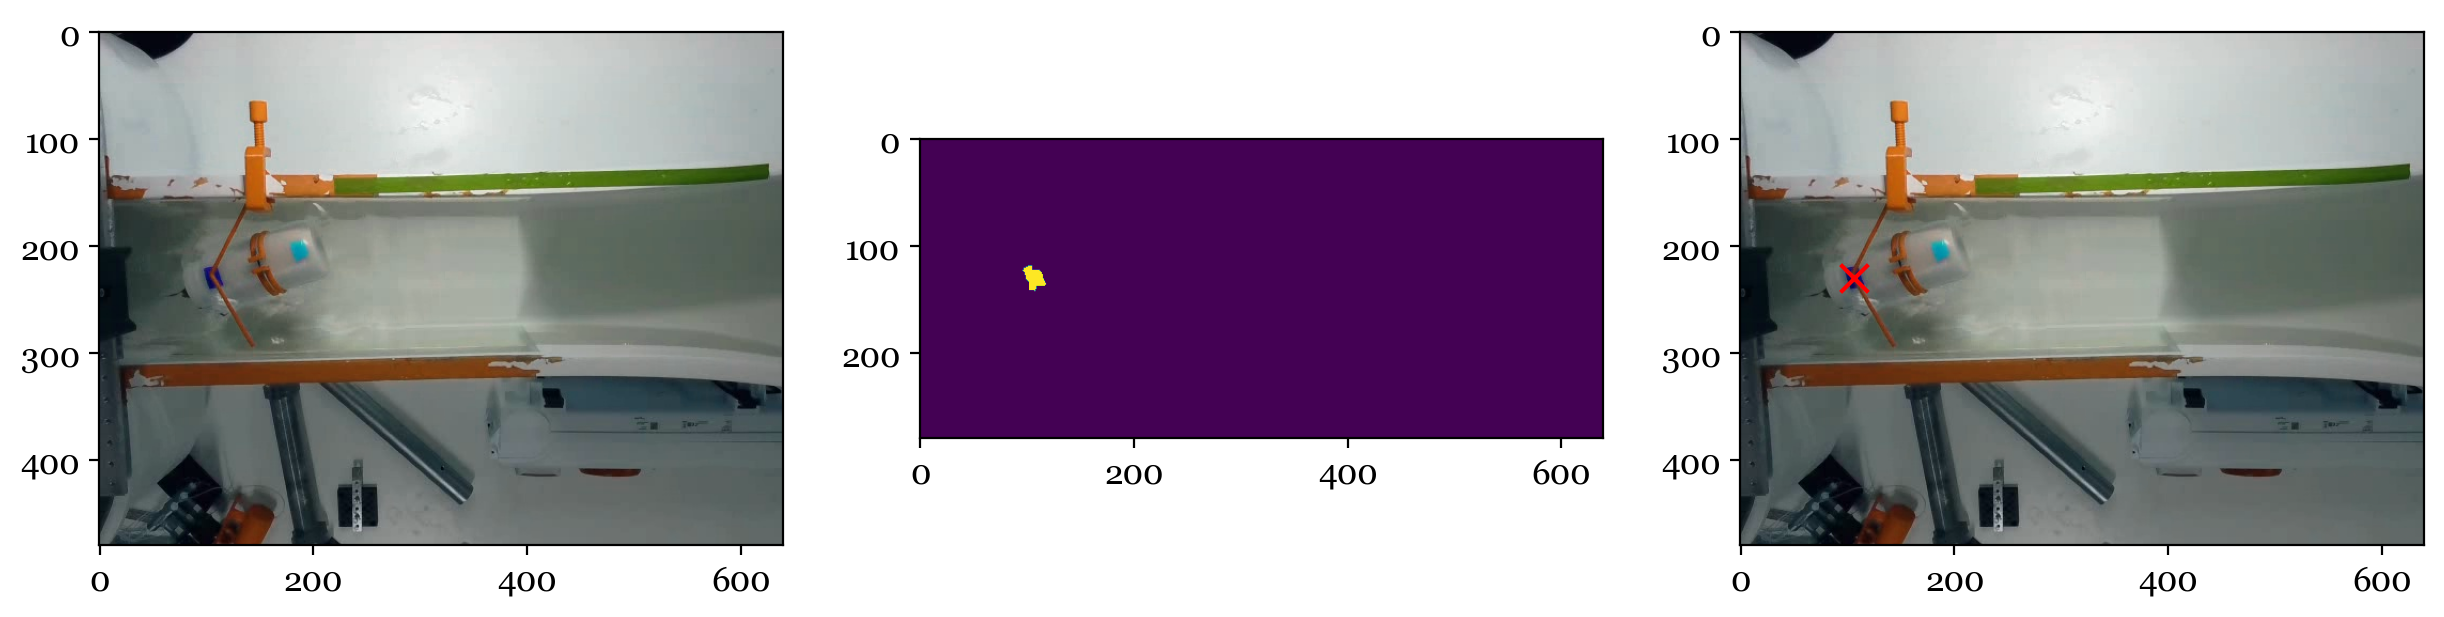

40_5.0_markedbug-37.jpg


In [42]:
from rlutils.vision import *
for f in os.listdir('/home/sardor/1-THESE/2-Robotic_Fish/2-DDPG/deepFish/servo-experiment/results/newCamera-fs/1/'):
    if f.endswith('.jpg'):
        img = cv2.imread('/home/sardor/1-THESE/2-Robotic_Fish/2-DDPG/deepFish/servo-experiment/results/newCamera-fs/1/'+f)
        cx,cy=red_point(img)
        if cx==-1:
            cx,cy, mask=red_point_debug(img)
            plot_img_mask(img, mask, cx, cy)
            print(f)
            

In [43]:
# Apply a morphological transformation to remove small noise
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Find the contour of the red point
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the list of contours and find the contour with the minimum area that is greater than the minimum surface area limit
pcnts = []
min_area_contour = 50
for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area_contour:
        pcnts.append(contour)
    else:
        print(f'contour area {area} is less than {min_area_contour}')
# Get the coordinates of the center of the red point
if len(pcnts) > 0:
    # c = max(contours, key=cv2.contourArea)
    c = max(pcnts, key=cv2.contourArea)
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    # print("Red point found at ({}, {})".format(cx, cy))
else:
    cx, cy = -1, -1  # print("Red point not found")
    

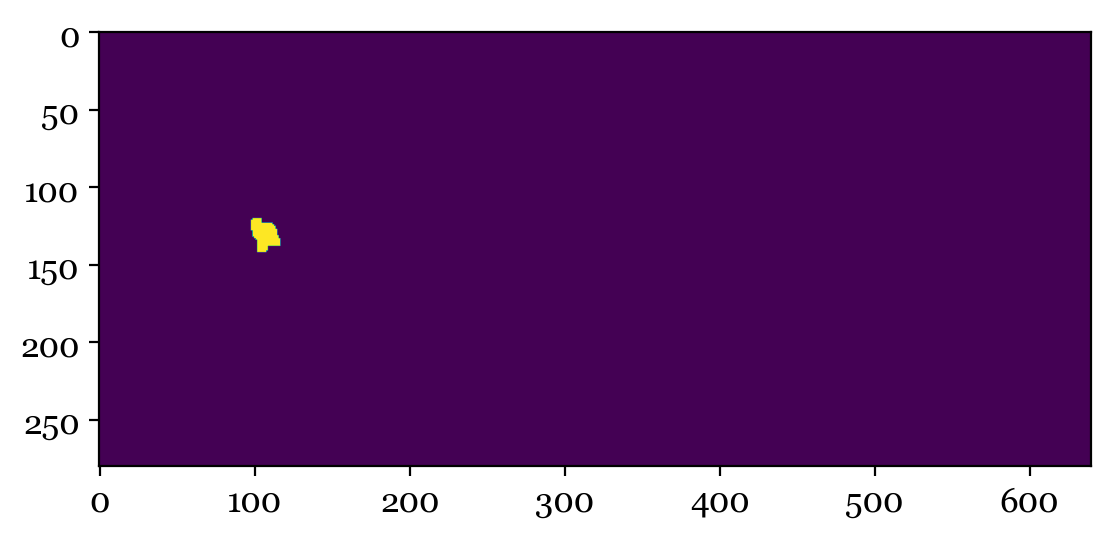

248.5


In [44]:
erosion = cv2.dilate(mask, kernel, iterations=2)
erosion = cv2.erode(erosion, kernel, iterations=2)
plt.imshow(erosion)
plt.show()
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    print(cv2.contourArea(contour))